In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
path='tv_shows.csv'
df = pd.read_csv(path)                
df.head()


,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [4]:
print(df.dtypes)

Unnamed: 0           int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)
df.replace(np.nan, 0, inplace=True)
df.replace('all', 'All', inplace=True)
df['Age'].replace(0,'All', inplace=True)

In [6]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [7]:
df.tail()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
5606,Tut's Treasures: Hidden Secrets,2018,All,0.0,0,0,0,0,1
5607,Paradise Islands,2017,All,0.0,0,0,0,0,1
5608,Wild Russia,2018,All,0.0,0,0,0,0,1
5609,Love & Vets,2017,All,0.0,0,0,0,0,1
5610,United States of Animals,2016,All,0.0,0,0,0,0,1


In [8]:
#df['Age'].replace('16+', 16, inplace=True)
#df['Age'].replace('7+', 7, inplace=True)
#df['Age'].replace('18+', 18, inplace=True)
#df['Age'].replace('13+', 13, inplace=True)
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100

In [9]:
df['Age'].value_counts()

All    2991
16+    1018
7+      848
18+     750
13+       4
Name: Age, dtype: int64

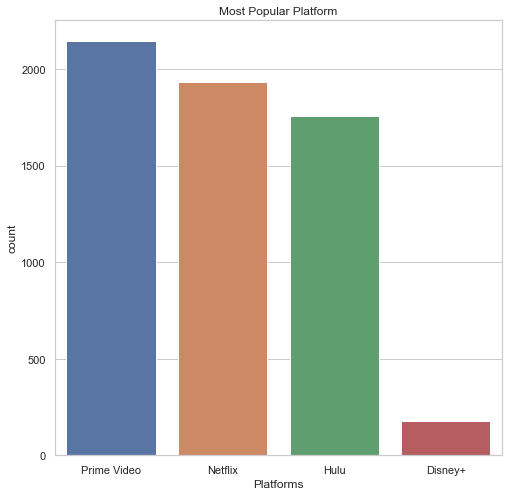

In [10]:
#We use the melt method from pandas to look at categorical variables that matter, by only looking at the columns for identifiers.
show_total=pd.melt(df,id_vars=['Age', 'IMDb', 'Rotten Tomatoes'],var_name="Platforms")
show_total=show_total[show_total["value"]==1]
#print(show_total) #Before
show_total=show_total.drop("value",axis=1) #We drop the Value column as it's no use to us here.
#print(show_total) #After
fig = plt.figure(figsize=(8,8))
sns.set_theme(style='whitegrid')
sns.countplot(x='Platforms',data=show_total, order=show_total['Platforms'].value_counts().index) #We sort from highest to lowest to show the difference properly.
plt.title('Most Popular Platform')
plt.show()


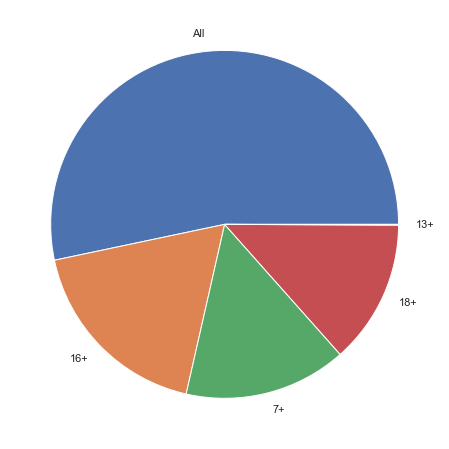

In [12]:
#What's the most popular age rating? It appears to be 'All' with no real restrictions. 
ageD = df['Age'].value_counts()
ageD = ageD.reset_index()
ageD = ageD.rename(columns={'Age':'Count'})
ageD = ageD.rename(columns={'index':'Age'})
plt.figure(figsize = (8,8))
plt.pie(ageD['Count'], labels = ageD['Age'])

plt.show()
#This shows that the vast majority of shows are targeted toward 'Everyone'

#Any trends after movies/shows released after 2015? Yes, there's clearly a drop in release years after 2018 at some point. 
#More dramatically around 2020.

years = df[df.Year >= 2015]
years_D = years.groupby('Year')[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum()
print('The earliest year is:',df[['Year']].min())

plt.figure(figsize = (12, 8))
sns.lineplot(x=years_D.index, y=years_D['Netflix'], legend = 'brief', label='Netflix')
sns.lineplot(x=years_D.index, y=years_D['Hulu'], legend = 'brief', label='Hulu')
sns.lineplot(x=years_D.index, y=years_D['Prime Video'], legend = 'brief', label='Prime Video')
sns.lineplot(x=years_D.index, y=years_D['Disney+'], legend = 'brief', label='Disney+')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Years of Movies/Shows')
plt.ylim(0,)
#The data shows us that things are looking pretty good until 2020. This was a surprise. I wonder what could of 'happened'?
#In the end around 2000, there was a big spike in movies created but dramatically dropped in 2020.

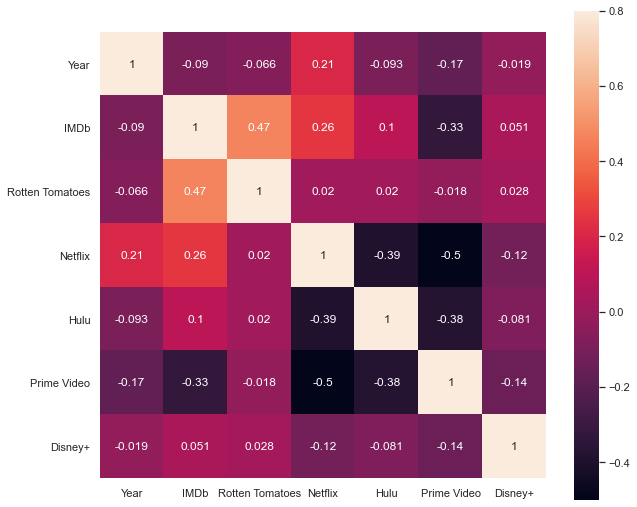

In [13]:
heatmap = df.corr()
heatmapFig = plt.figure(figsize = (10, 9))
sns.heatmap(heatmap, vmax = .8, square = True, annot= True)
plt.show()
#This is to show the correlation in a heatmap for the data.

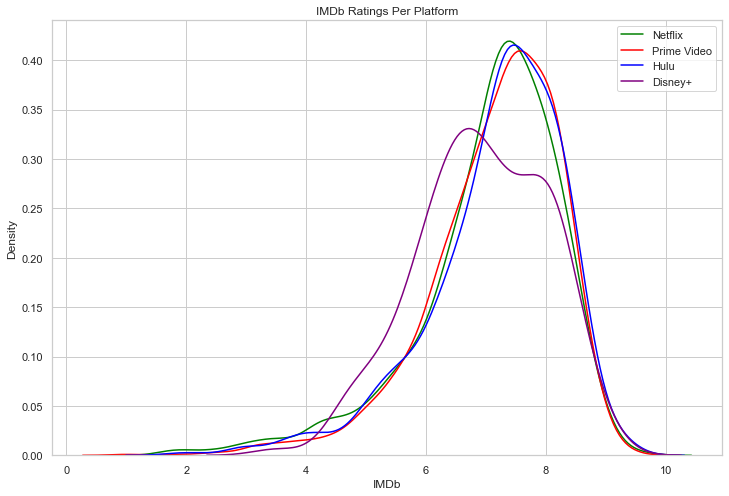

In [56]:
#What's the quality of each Platform by rating for IMDb?
Hulu_df = df.loc[(df['Hulu'] > 0) ]
Disney_df = df.loc[(df['Disney+'] > 0) ]
PV_df = df.loc[(df['Prime Video'] > 0)  ]
Netflix_df = df.loc[(df['Netflix'] > 0)  ]

hulu_dim = Hulu_df.loc[Hulu_df['IMDb'] > 0]
netflix_dim = Netflix_df.loc[Netflix_df['IMDb'] > 0]
pv_dim = PV_df.loc[PV_df['IMDb'] > 0]
disney_dim = Disney_df.loc[Disney_df['IMDb'] > 0]

plt.figure(figsize=(12,8))
plt.title('IMDb Ratings Per Platform')

sns.kdeplot(data=hulu_dim['IMDb'], color='green', legend=True)
sns.kdeplot(data=netflix_dim['IMDb'], color='red', legend=True)
sns.kdeplot(data=pv_dim['IMDb'], color='blue',legend=True)
sns.kdeplot(data=disney_dim['IMDb'], color='purple',legend=True)
plt.legend(['Netflix', 'Prime Video', 'Hulu', 'Disney+'])
plt.show()

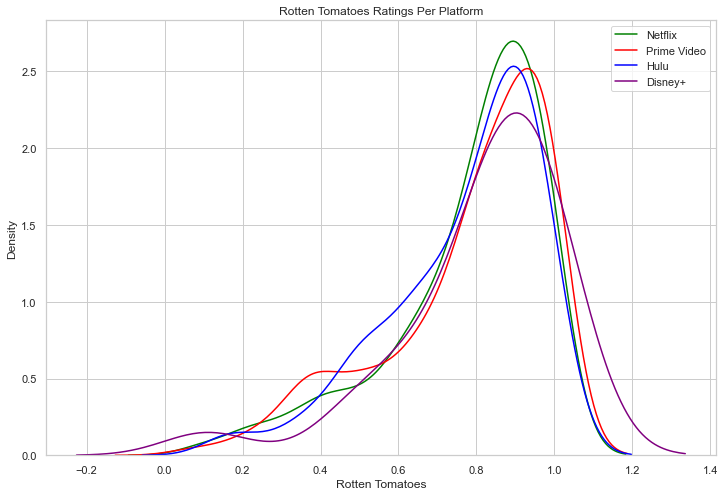

In [59]:
#What's the quality of each Platform by rating for Rotten Tomatoes?
#What's the quality of each Platform by rating for IMDb?
Hulu_dt = df.loc[(df['Hulu'] > 0) ]
Disney_dt = df.loc[(df['Disney+'] > 0) ]
PV_dt = df.loc[(df['Prime Video'] > 0)  ]
Netflix_dt = df.loc[(df['Netflix'] > 0)  ]

hulu_dim = Hulu_dt.loc[Hulu_dt['Rotten Tomatoes'] > 0]
netflix_dim = Netflix_dt.loc[Netflix_dt['Rotten Tomatoes'] > 0]
pv_dim = PV_df.loc[PV_dt['Rotten Tomatoes'] > 0]
disney_dim = Disney_dt.loc[Disney_dt['Rotten Tomatoes'] > 0]

plt.figure(figsize=(12,8))
plt.title('Rotten Tomatoes Ratings Per Platform')

sns.kdeplot(data=hulu_dim['Rotten Tomatoes'], color='green', legend=True)
sns.kdeplot(data=netflix_dim['Rotten Tomatoes'], color='red', legend=True)
sns.kdeplot(data=pv_dim['Rotten Tomatoes'], color='blue',legend=True)
sns.kdeplot(data=disney_dim['Rotten Tomatoes'], color='purple',legend=True)
plt.legend(['Netflix', 'Prime Video', 'Hulu', 'Disney+'])
plt.show()

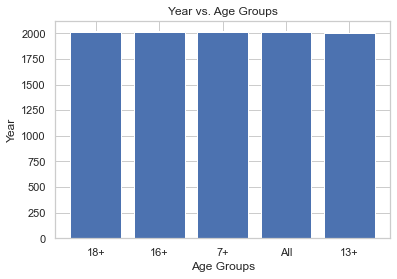

<Figure size 1080x720 with 0 Axes>

In [19]:
x = df['Age']
y = df['Year']
#plt.scatter(x, y)
plt.bar(x,y)
plt.title('Year vs. Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Year')
plt.figure(figsize=(15,10))
plt.show()